# Assignment
## Consider only the below columns and prepare a prediction model for predicting Price
 
##### Model -- model of the car
##### Price  -- Offer Price in EUROs	
##### Age_08_04 -- Age in months as in August 2004	
##### Mfg_Month -- Manufacturing month (1-12)	
##### Mfg_Year	-- Manufacturing Year
##### KM -- Accumulated Kilometers on odometer
##### Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
##### HP -- Horse Power
##### Met_Color	 -- Metallic Color?  (Yes=1, No=0)
##### Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
##### Automatic	-- Automatic ( (Yes=1, No=0)
##### cc -- Cylinder Volume in cubic centimeters
##### Doors -- Number of doors
##### Cylinders	-- Number of cylinders
##### Gears -- Number of gear positions
##### Quarterly_Tax -- Quarterly road tax in EUROs
##### Weight -- Weight in Kilograms
##### Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
##### BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
##### Guarantee_Period -- 	Guarantee period in months
##### ABS -- Anti-Lock Brake System (Yes=1, No=0)
##### Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
##### Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
##### Airco -- Airconditioning  (Yes=1, No=0)
##### Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
##### Boardcomputer -- Boardcomputer  (Yes=1, No=0)
##### CD_Player -- CD Player  (Yes=1, No=0)
##### Central_Lock -- Central Lock  (Yes=1, No=0)
##### Powered_Windows -- Powered Windows  (Yes=1, No=0)
##### Power_Steering -- Power Steering  (Yes=1, No=0)
##### Radio -- Radio  (Yes=1, No=0)
##### Mistlamps	-- Mistlamps  (Yes=1, No=0)
##### Sport_Model -- Sport Model  (Yes=1, No=0)
##### Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
##### Metallic_Rim --Metallic Rim  (Yes=1, No=0)
##### Radio_cassette -- Radio Cassette  (Yes=1, No=0)
##### Tow_Bar -- Tow Bar  (Yes=1, No=0)




In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
from scipy import stats  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Check out the Data

In [2]:
df = pd.read_csv(r"C:\Users\PRANAV\Desktop\lms\Multi Linear Regression\ToyotaCorolla.csv",header= 0,encoding= 'unicode_escape')

In [3]:
df.shape

(1436, 38)

### EDA

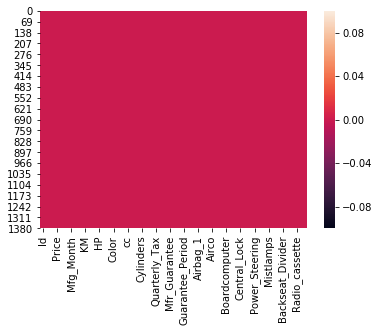

In [4]:
sns.heatmap(df.isnull())
# there is no null values

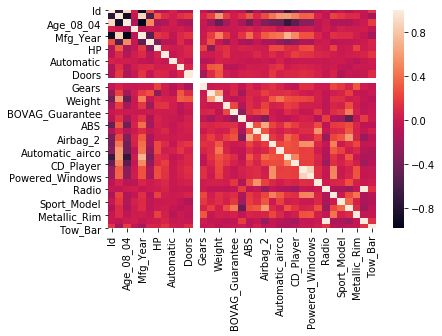

In [5]:
sns.heatmap(df.corr())

In [6]:
df.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [7]:
Fuel = ['Fuel_Type']
df = pd.get_dummies(df,columns=Fuel,drop_first=True)


In [8]:
colr = ['Color']
df = pd.get_dummies(df,columns=colr,drop_first=True) 

In [9]:
df.shape

(1436, 47)

In [10]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears',
       'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Color_Black',
       'Color_Blue', 'Color_Green', 'Color_Grey', 'Color_Red', 'Color_Silver',
       'Color_Violet', 'Color_White', 'Color_Yellow'],
      dtype='object')

In [11]:
df = df.drop('Id',axis=1)

In [12]:
df = df.drop('Model',axis=1)

In [13]:
df = df.drop('Mfg_Month',axis=1)

In [14]:
df = df.drop('Radio_cassette',axis=1)

### Training a Linear Regression Model

In [15]:
# X and y arrays
X = df.drop('Price',axis=1)
y = df['Price']

### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression

C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
p = lm.predict(X_test)

In [22]:
accuracy = lm.score(X_test,y_test)
print('Accuracy: ',accuracy)

Accuracy:  0.910987246100727
